# Лабораторная работа 6

# Задача 1

## Генерация датасетов

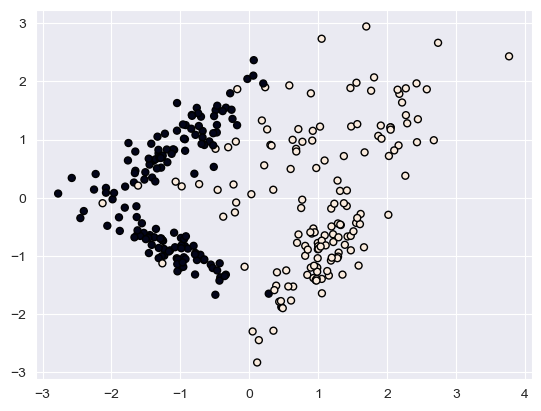

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


data_1, data_y_1 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=130)

plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

In [2]:
data_1

array([[-0.02868686,  2.04388363],
       [ 2.27041985,  1.42135291],
       [-1.00147177, -1.2014376 ],
       [ 0.57937236,  1.93263194],
       [-0.46001793,  0.1371689 ],
       [-1.39042182,  0.63758649],
       [ 0.53452578, -1.24704031],
       [ 1.54846703, -0.43033484],
       [ 1.42390235, -0.66417735],
       [-0.92403547,  1.2504802 ],
       [-1.27972514,  0.51914345],
       [ 1.32606785, -0.46697709],
       [-1.65312152,  0.46476816],
       [-0.72853996,  0.23631116],
       [ 1.66229418, -0.84931764],
       [ 0.99205326, -0.77456715],
       [ 0.46298519, -1.87565333],
       [-1.89094852, -0.33448194],
       [ 0.30523929,  0.90961122],
       [-1.06901816,  0.27817863],
       [ 1.31482652,  0.11959335],
       [-1.1892571 ,  0.6121558 ],
       [-0.48923115,  1.50693568],
       [ 0.21525344,  0.55897625],
       [ 1.29471143, -0.94173345],
       [-0.22987674,  0.22994024],
       [-2.07972195,  0.1705762 ],
       [-2.77327828,  0.07403439],
       [ 0.92814203,

In [3]:
data_y_1

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

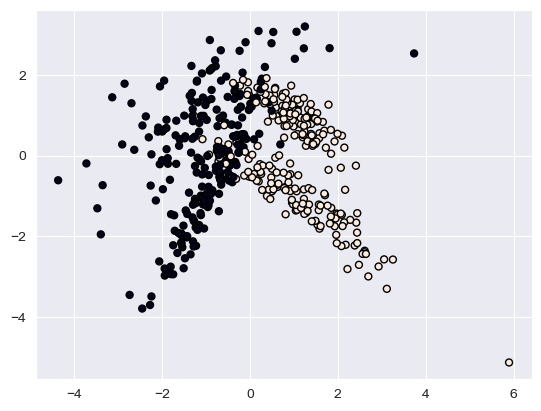

In [4]:
data_2, data_y_2 = make_classification(n_samples=500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

plt.scatter(data_2[:, 0], data_2[:, 1], marker="o", c=data_y_2, s=25, edgecolor="k")
plt.show()

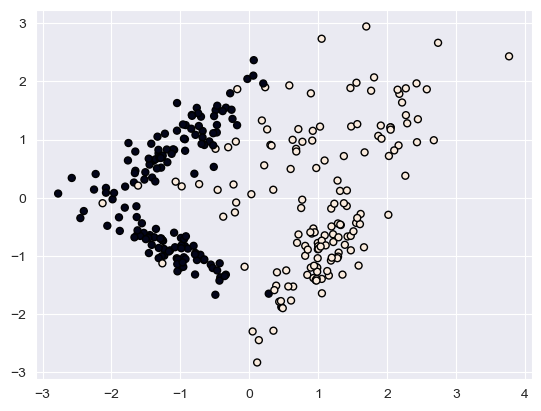

In [5]:
plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

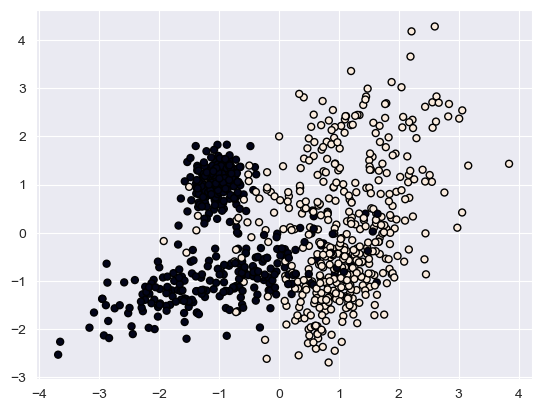

In [6]:
data_3, data_y_3 = make_classification(n_samples=900, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=200)

plt.scatter(data_3[:, 0], data_3[:, 1], marker="o", c=data_y_3, s=25, edgecolor="k")
plt.show()

In [7]:
data_3

array([[-0.58717342, -1.0223633 ],
       [ 0.32179001, -1.15806865],
       [-0.2722921 , -0.60066922],
       ...,
       [ 0.44937311,  0.50637135],
       [ 0.49874282, -0.85694015],
       [-2.06052394, -1.13159107]])

# Кластеризация

## K - means

In [8]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(2, n_init='auto').fit(data_1)
kmeans_2 = KMeans(2, n_init='auto').fit(data_2)
kmeans_3 = KMeans(2, n_init='auto').fit(data_3)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [9]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score

def cluster_and_metrics_kmeans(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"силуэт: {rand_score(claster.labels_, data_y)}")
    print(f"rand score: {silhouette_score(data, claster.labels_)}\n")
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)
    plt.scatter(claster.cluster_centers_[:,0], claster.cluster_centers_[:,1], s=100, c='red')

Датасет: 1
силуэт: 0.5010256410256411
rand score: 0.3519044015091569


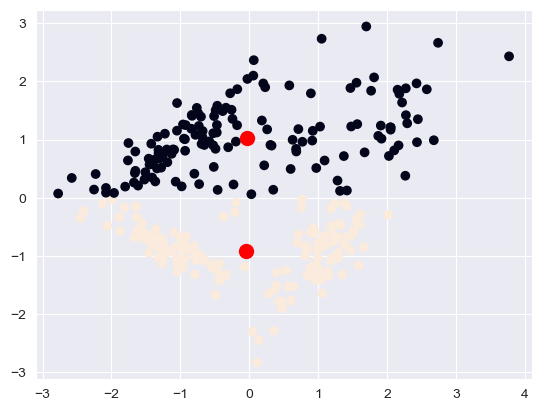

In [10]:
cluster_and_metrics_kmeans(data=data_1, data_y=data_y_1, claster=kmeans_1, num=1)

Датасет: 2
силуэт: 0.49951102204408815
rand score: 0.3472219171029111


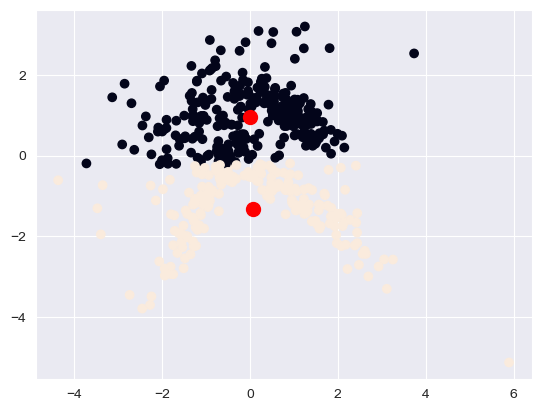

In [11]:
cluster_and_metrics_kmeans(data=data_2, data_y=data_y_2, claster=kmeans_2, num=2)

Датасет: 3
силуэт: 0.5012458286985539
rand score: 0.37523460021405286


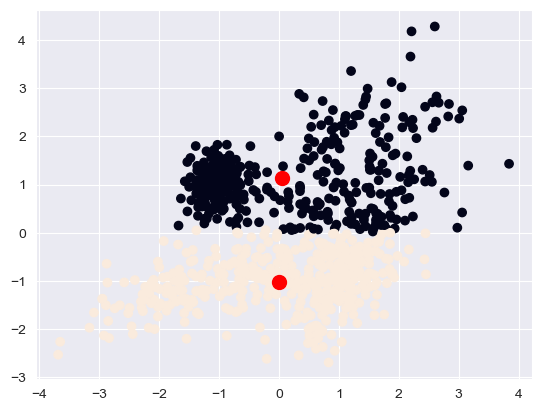

In [12]:
cluster_and_metrics_kmeans(data=data_3, data_y=data_y_3, claster=kmeans_3, num=3)

## Affinity propagation

In [13]:
from sklearn.cluster import AffinityPropagation

affinity_1 = AffinityPropagation(preference=-42).fit(data_1)
affinity_2 = AffinityPropagation(preference=-42).fit(data_2)
affinity_3 = AffinityPropagation(preference=-42).fit(data_3)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [14]:
def cluster_and_metrics_affinity(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"силуэт: {rand_score(claster.labels_, data_y)}")
    print(f"rand score: {silhouette_score(data, claster.labels_)}\n")
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)
    plt.scatter(claster.cluster_centers_[:,0], claster.cluster_centers_[:,1], s=50, c='black')
    

Датасет: 1
силуэт: 0.627469342251951
rand score: 0.44218738638930155


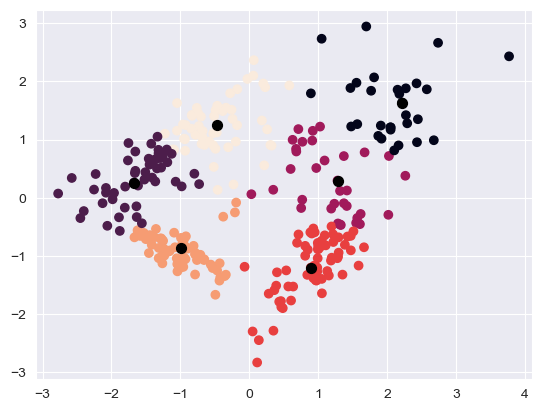

In [15]:
cluster_and_metrics_affinity(data=data_1, data_y=data_y_1, claster=affinity_1, num=1)

Датасет: 2
силуэт: 0.5446012024048096
rand score: 0.18982786817499828


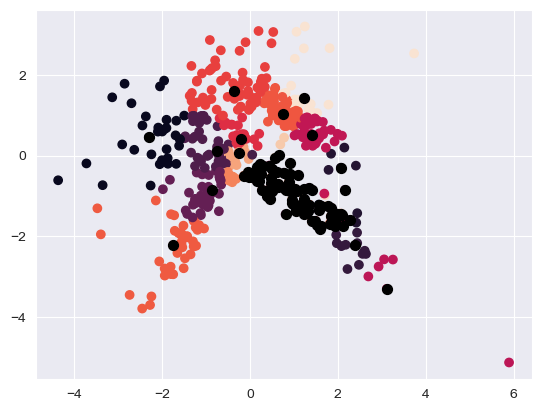

In [16]:
cluster_and_metrics_affinity(data=data_2, data_y=data_y_2, claster=affinity_2, num=2)

Датасет: 3
силуэт: 0.6168953157829687
rand score: 0.4329950695040072


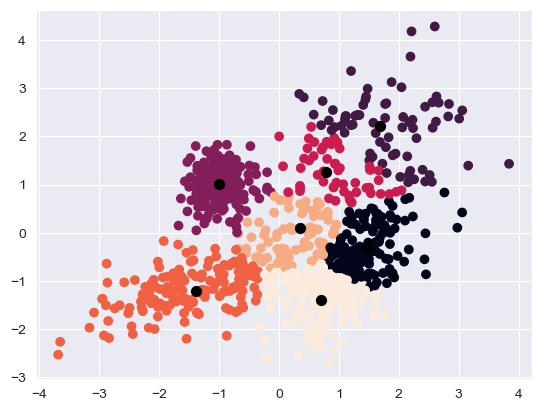

In [17]:
cluster_and_metrics_affinity(data=data_3, data_y=data_y_3, claster=affinity_3, num=3)

## DB-SCAN

In [18]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan_1 = DBSCAN().fit(data_1)
dbscan_2 = DBSCAN().fit(data_2)
dbscan_3 = DBSCAN().fit(data_3)

In [19]:
def cluster_and_metrics_dbscan(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    print(f"силуэт: {rand_score(claster.labels_, data_y)}")
    print(f"rand score: {silhouette_score(data, claster.labels_)}\n")
    print(np.unique(claster.labels_))
    plt.scatter(data[:,0], data[:,1], c=claster.labels_)

Датасет: 1
силуэт: 0.4991304347826087
rand score: 0.367765557373552

[-1  0]


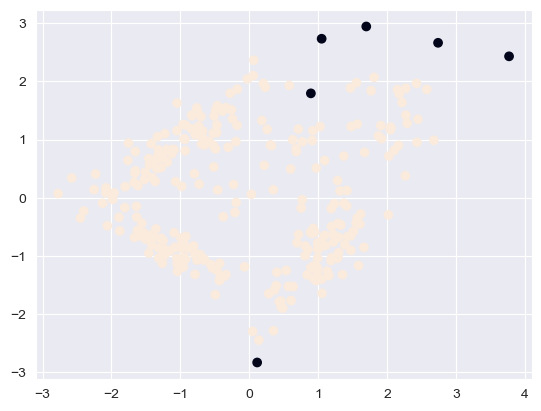

In [20]:
cluster_and_metrics_dbscan(data=data_1, data_y=data_y_1, claster=dbscan_1, num=1)

Датасет: 2
силуэт: 0.5025330661322646
rand score: 0.4050656049776778

[-1  0]


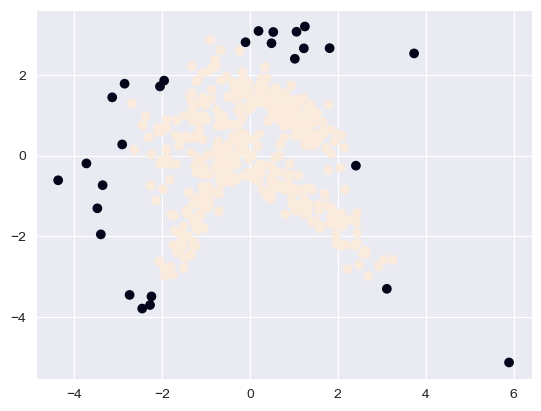

In [21]:
cluster_and_metrics_dbscan(data=data_2, data_y=data_y_2, claster=dbscan_2, num=2)

Датасет: 3
силуэт: 0.49950562353231986
rand score: 0.4364308430379813

[-1  0]


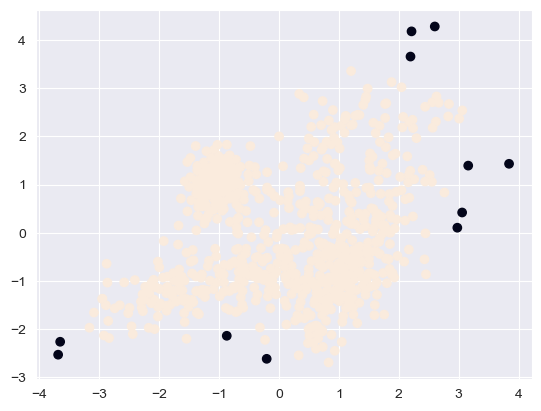

In [22]:
cluster_and_metrics_dbscan(data=data_3, data_y=data_y_3, claster=dbscan_3, num=3)

## Gaussian Mixtures, EM

In [23]:
from sklearn.mixture import GaussianMixture

gm_1 = GaussianMixture(n_components=3).fit(data_1)
gm_1.predict(data_1)

gm_2 = GaussianMixture(n_components=3).fit(data_2)
gm_2.predict(data_2)

gm_3 = GaussianMixture(n_components=3).fit(data_3)
gm_3.predict(data_3)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1,
       2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1,
       0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,

In [24]:
def cluster_and_metrics_gm(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    plt.scatter(data[:,0], data[:,1], c=claster.predict(data))
    plt.scatter(claster.means_[:,0], claster.means_[:,1], s=100, c='red')

Датасет: 1


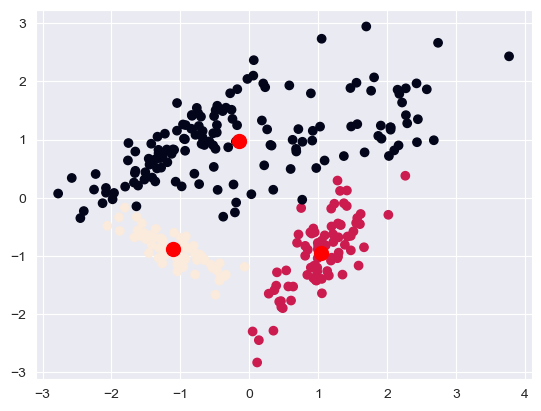

In [25]:
cluster_and_metrics_gm(data=data_1, data_y=data_y_1, claster=gm_1, num=1)

Датасет: 2


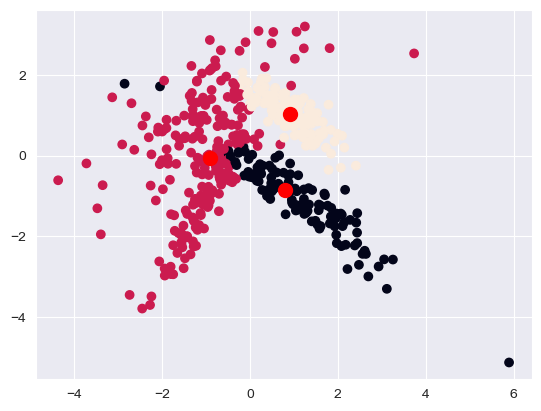

In [26]:
cluster_and_metrics_gm(data=data_2, data_y=data_y_2, claster=gm_2, num=2)

Датасет: 3


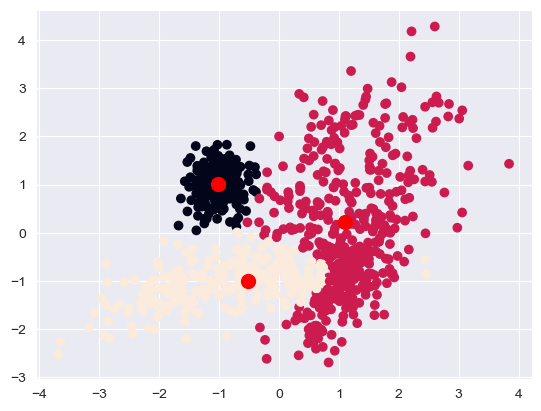

In [27]:
cluster_and_metrics_gm(data=data_3, data_y=data_y_3, claster=gm_3, num=3)

## Иерархическая кластеризация

In [28]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

clusters_1 = hierarchy.linkage(data_1, method="ward")
clusters_2 = hierarchy.linkage(data_2, method="ward")
clusters_3 = hierarchy.linkage(data_3, method="ward")

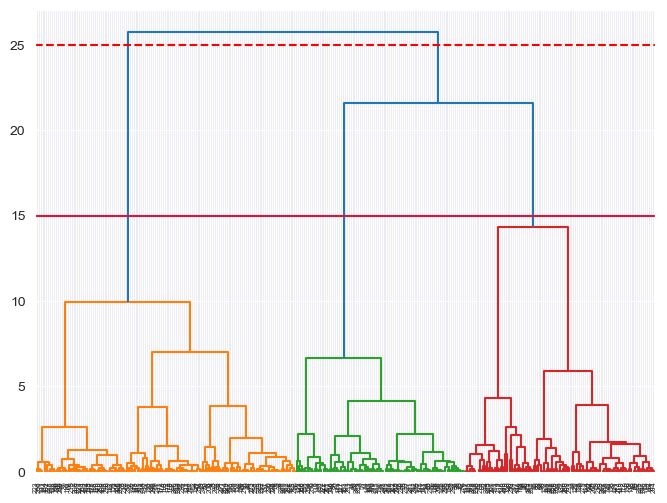

In [29]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_1)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

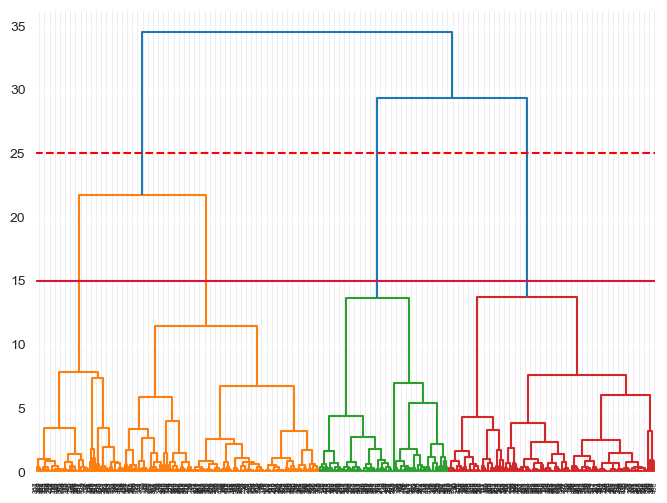

In [30]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_2)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

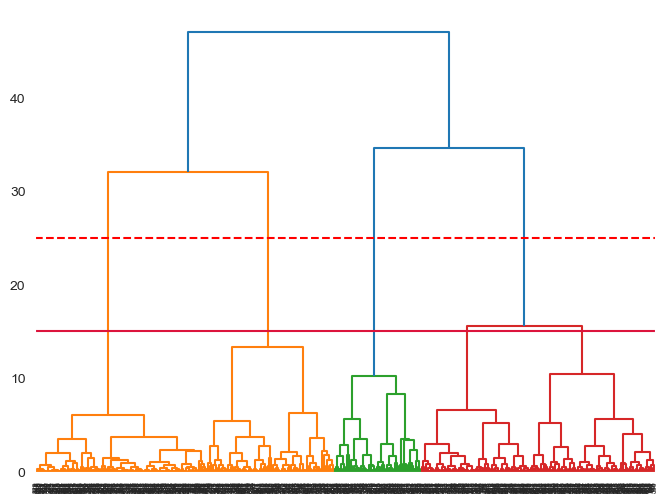

In [31]:
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters_3)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(15, color='crimson')

In [32]:
def cluster_and_metrics_cluster(data, data_y, claster, num = None, giperparam = None) -> None:
    print(f"Датасет: {num}")
    clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data)
    plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

Датасет: 1


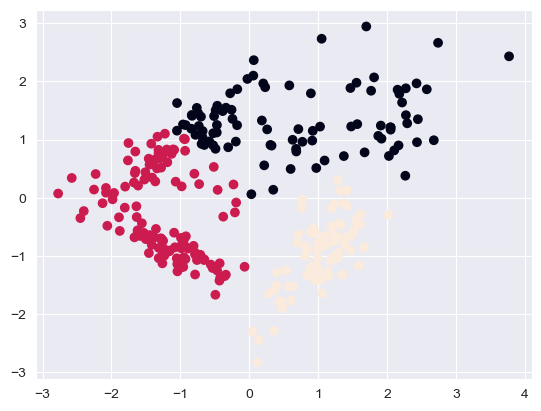

In [33]:
cluster_and_metrics_cluster(data=data_1, data_y=data_y_1, claster=clusters_1, num=1)

Датасет: 2


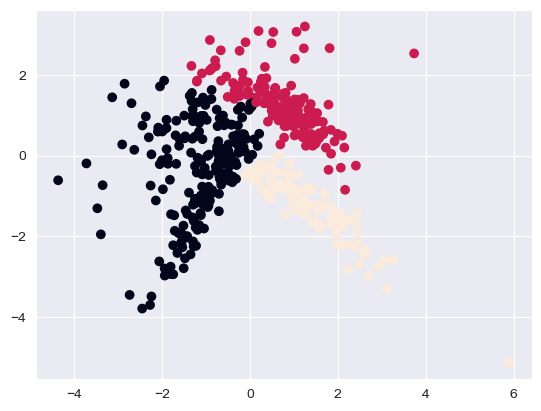

In [34]:
cluster_and_metrics_cluster(data=data_2, data_y=data_y_2, claster=clusters_2, num=2)

Датасет: 3


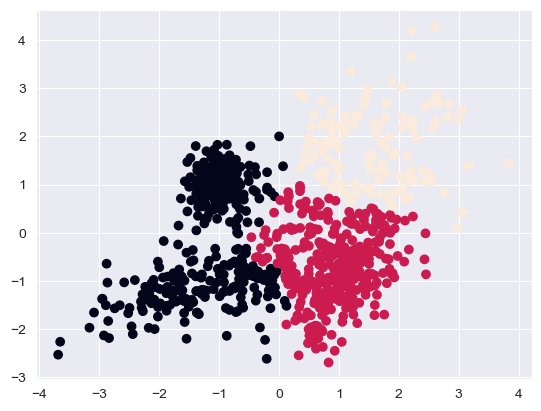

In [35]:
cluster_and_metrics_cluster(data=data_3, data_y=data_y_3, claster=clusters_3, num=3)

## Карты Кохонена

In [36]:
from sklearn_som.som import SOM

In [37]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_1)
predictions_1 = iris_som.predict(data_1)
predictions_1

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], d

In [38]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import davies_bouldin_score

print(rand_score(predictions_1, data_y_1))
print(jaccard_score(predictions_1, data_y_1, average="micro"))
print(silhouette_score(data_1, predictions_1))
print(davies_bouldin_score(data_1, predictions_1))

0.5322408026755853
0.22699386503067484
0.31469995618513386
1.2948647689125508


In [39]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_2)
predictions_2 = iris_som.predict(data_2)
predictions_2

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [40]:
print(rand_score(predictions_2, data_y_2))
print(jaccard_score(predictions_2, data_y_2, average="micro"))
print(silhouette_score(data_2, predictions_2))
print(davies_bouldin_score(data_2, predictions_2))

0.8069418837675351
0.8050541516245487
0.34402022726134623
1.1932262074052096


In [41]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data_3)
predictions_3 = iris_som.predict(data_3)
predictions_3

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,

In [42]:
print(rand_score(predictions_3, data_y_3))
print(jaccard_score(predictions_3, data_y_3, average="micro"))
print(silhouette_score(data_3, predictions_3))
print(davies_bouldin_score(data_3, predictions_3))

0.8396761834136696
0.04590354445090064
0.3916132081851416
1.118471290208898


# Задача 2

In [43]:
import pandas as pd

link = "./data/pred_data_lab_4.csv"
data = pd.read_csv(link)
del data[data.columns [0]]
for i in ["used_chip", "used_pin_number", "repeat_retailer", "online_order", "fraud"]:
    data[i].astype(int)
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,True,True,False,False,False
1,10.829943,0.175592,1.294219,True,False,False,False,False
2,5.091079,0.805153,0.427715,True,False,False,True,False
3,2.247564,5.600044,0.362663,True,True,False,True,False
4,44.190936,0.566486,2.222767,True,True,False,True,False
...,...,...,...,...,...,...,...,...
860314,2.207101,0.112651,1.626798,True,True,False,False,False
860315,19.872726,2.683904,2.778303,True,True,False,False,False
860316,2.914857,1.472687,0.218075,True,True,False,True,False
860317,4.258729,0.242023,0.475822,True,False,False,True,False


In [44]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_sc = sc.fit_transform(data)

kmeans = KMeans(n_clusters=8, random_state=100)
kmeans_fit = kmeans.fit(df_sc)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

In [45]:
kmeans_fit.cluster_centers_

array([[-7.98820320e-01, -1.27721289e-01, -1.77869704e-01,
        -2.65376507e+00,  1.61585991e-02, -3.34486104e-01,
        -1.34740379e-02, -2.11915844e-01],
       [-1.42539203e-01, -2.39389157e-01, -2.06072907e-01,
         3.76823107e-01,  1.36125949e+00, -3.34486104e-01,
         7.33123439e-01, -2.11915844e-01],
       [-1.67728246e-01, -2.51227411e-01,  6.60581354e-03,
         3.76823107e-01,  3.28890144e-03, -3.34486104e-01,
        -1.36402677e+00, -2.11915844e-01],
       [-1.92535084e-01, -2.72434278e-01, -2.04100941e-01,
         3.76823107e-01, -7.34613795e-01, -3.34486104e-01,
         7.33123439e-01, -2.11915844e-01],
       [-4.08795672e-03, -1.58241233e-03,  2.72207789e+00,
        -9.61154323e-02, -3.39908498e-02, -3.33761593e-01,
         6.46049282e-01,  4.71885433e+00],
       [ 2.60424747e+00, -1.55231674e-01, -1.41739669e-01,
         3.76823107e-01, -7.08945475e-02, -2.42695165e-01,
        -3.00683502e-02, -1.91661346e-01],
       [-8.00152834e-02, -1.008772

In [46]:
kmeans.labels_

array([5, 2, 3, ..., 1, 3, 5])

In [47]:
kmeans_fit.predict(df_sc)

array([5, 2, 3, ..., 1, 3, 5])

In [48]:
kmeans_fit.inertia_ # это общая WCSS.

2299155.447985798

In [49]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [50]:
silhouette_score(df_sc, kmeans.labels_)                                            

KeyboardInterrupt: 